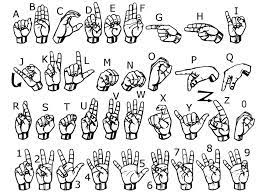
### مقدمه
`فكره التواصل الان بين الناس العاديين وبين الصم أصبحت جزء مهم من حياتنا. حيث يعاني الأشخاص الصم والبكم غير القادرين على التحدث والاستماع من الكثير من المشاكل أثناء التواصل مع الأشخاص العاديين. هناك العديد من الطرق التي يحاول الأشخاص ذوو الإعاقات التواصل من خلالها. من أبرز الطرق استخدام لغة الإشارة ، أي إيماءات اليد. من الضروري تطوير تطبيق للتعرف على إيماءات لغة الإشارة وأفعالها حتى يتمكن الصم والبكم من التواصل بسهولة حتى مع أولئك الذين لا يفهمون لغة الإشارة. الهدف من هذا العمل هو اتخاذ خطوة أولية في كسر حاجز التواصل بين الأشخاص العاديين والصم والبكم بمساعدة لغة الإشارة.`

## تحميل المكتابات

In [3]:
import numpy as np
import pandas as pd 
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## قراءه البيانات 

In [4]:
train_df=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')
test_df=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test.csv')

In [9]:
#الان سوف نقوم بعرض جزء من البيانات حتى نرى ماهوا شكلها وكيفيه تكوينها
train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [10]:
#هنا يتم عرض حجم البيانات 
train_df.shape

(27455, 785)

In [5]:
#هنا يتم عرض جميع المعلومات حول البيانات المقروءه
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [6]:
#هنا يتم عرض جميع المعلومات حول البيانات المقروءه
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [8]:
#هنا يتم عرض واستبيان جميع العمليات الاحصائيه على البيانات مثل المتوسط الحسابى والمين والانحارف المعيارى 
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


`تتكون مجموعة بيانات train_df من العمود الأول الذي يمثل الملصقات من 1 إلى 24. ويتم تحميل الملصق في إطار بيانات منفصل يسمى "train_label" وسوف نقوم  بإسقاط عمود "التسمية" من إطار بيانات التدريب الأصلي الذي يتكون الآن من 784 قيم بكسل فقط لكل صورة.`

In [11]:
train_label=train_df['label']
train_label.head()
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


`الان سوف يتم تحويل إطار البيانات إلى نوع مصفوفة عددية لاستخدامها أثناء تدريب    
CNN. 
يتم تحويل المصفوفة من 1-D إلى 3-D وهو المدخل المطلوب للطبقة الأولى من
CNN.
يتم إجراء معالجة مسبقة مماثلة لإطار بيانات الاختبار.`

In [13]:
#الان نقوم بعمل اعداده هيكليه للبيانات التدريب حتى تكون مناسبه للتدريب
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [15]:
#هنا تم اسقاط العمود الاول من بيانات الاختبار
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


`تحويل تسميات الأعداد الصحيحة إلى نموذج ثنائي`

يتكون إطار بيانات التسمية من قيم فردية من 1 إلى 24 لكل صورة فردية. ستكون طبقة إخراج CNN من 24 عقدة نظرًا لأنها تحتوي على 24 تصنيفًا مختلفًا كمصنف متعدد الملصقات. ومن ثم يتم ترميز كل عدد صحيح في مصفوفة ثنائية من الحجم 24 مع التسمية المقابلة لها 1 وجميع التسميات الأخرى 0. مثل y = 4 المصفوفة هي [0 0 0 1 0 0 ..... 0]. يتم استخدام حزمة 
LabelBinarizer من sklearn.preprocessing
لذلك


In [16]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [19]:
print(y_train)
print("******************************")
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
******************************
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [20]:
X_test=X_test.values.reshape(-1,28,28,1)

In [22]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


`هنا قمنا بعمل زيادة مجموعة بيانات  لتوليد بيانات جديدة`

تسمح حزمة ImageDataGenerator من keras.preprocessing.image بإضافة تشوهات مختلفة إلى مجموعة بيانات الصورة عن طريق توفير تدوير عشوائي أو تكبير / تصغير أو قياس الارتفاع أو العرض وما إلى ذلك للصور بكسل ببكسل.

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255


### الان يمكنا عمل عرض البيانات عن طريق الرسومات البيانيه

Text(0.5, 1.0, 'label: 13  letter: M')

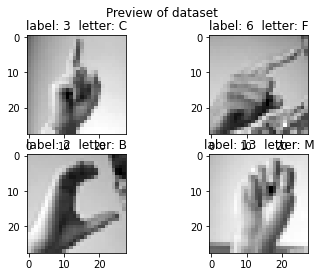

In [28]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Frequency of each label')

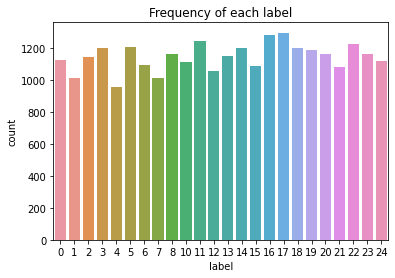

In [32]:
#مخطط التردد للتسميات
sns.countplot(train_label)
plt.title("Frequency of each label")



# بناء نموذج CNN 
    يتكون النموذج من:
    ثلاث طبقات التفاف اتبعت كل منها 
    bt MaxPooling
    لالتقاط أفضل للميزات
    طبقة كثيفة 512 وحدة
    طبقة الإخراج تحتوي على 24 وحدة لـ 24 فئة مختلفة

# Convolution layers

Conv layer 1 -- UNITS - 128 KERNEL SIZE - 5 * 5 STRIDE LENGTH - 1 ACTIVATION - ReLu

Conv layer 2 -- UNITS - 64 KERNEL SIZE - 3 * 3 STRIDE LENGTH - 1 ACTIVATION - ReLu

Conv layer 3 -- UNITS - 32 KERNEL SIZE - 2 * 2 STRIDE LENGTH - 1 ACTIVATION - ReLu

MaxPool layer 1 -- MAX POOL WINDOW - 3 * 3 STRIDE - 2

MaxPool layer 2 -- MAX POOL WINDOW - 2 * 2 STRIDE - 2

MaxPool layer 3 -- MAX POOL WINDOW - 2 * 2 STRIDE - 2

In [33]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

### طبقات متعدده وخرجية

In [34]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [35]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### تدريب الموديل

In [42]:
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/35
138/138 [==============================] - 26s 190ms/step - loss: 0.4771 - accuracy: 0.8386 - val_loss: 7.1385 - val_accuracy: 0.0372
Epoch 2/35
138/138 [==============================] - 26s 191ms/step - loss: 0.4264 - accuracy: 0.8545 - val_loss: 7.9683 - val_accuracy: 0.0372
Epoch 3/35
138/138 [==============================] - 26s 186ms/step - loss: 0.3942 - accuracy: 0.8680 - val_loss: 8.0121 - val_accuracy: 0.0372
Epoch 4/35
138/138 [==============================] - 26s 190ms/step - loss: 0.3655 - accuracy: 0.8760 - val_loss: 7.5000 - val_accuracy: 0.0372
Epoch 5/35
138/138 [==============================] - 26s 191ms/step - loss: 0.3409 - accuracy: 0.8851 - val_loss: 8.1853 - val_accuracy: 0.0372
Epoch 6/35
138/138 [==============================] - 26s 191ms/step - loss: 0.3124 - accuracy: 0.8964 - val_loss: 7.3002 - val_accuracy: 0.0372
Epoch 7/35
138/138 [==============================] - 26s 187ms/step - loss: 0.3005 - accuracy: 0.8982 - val_loss: 8.0949 - val_ac

### الان يمكننا تقييم النموذج

In [43]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

225/225 [==============================] - 2s 9ms/step - loss: 13.9629 - accuracy: 0.0608


### طباعه دقة النموذج

In [61]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 6.079196929931641%
